In [1]:
from sklearn import preprocessing, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
import statsmodels.api as sm
from scipy import stats
from sklearn import tree

Esta base de datos es una muy comun usada para problemas de clasificacion, es sobre las sub especies de una flor llamada iris y tienen y la idea es clasificar segun el largo y ancho de los petalos y el sépalo

In [2]:
#leer data
iris= pd.read_csv("../iris/iris.csv", index_col=0)


In [3]:
#mostrar las primeras filas
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#nombres de las columnas
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
#descripcion de datos
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#agrupar por especies
group = iris.groupby("Species")

In [7]:
#describe del petalwidth
group["PetalWidthCm"].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Iris-setosa,50.0,0.244,0.107210,0.1,0.2,0.2,0.3,0.6
Iris-versicolor,50.0,1.326,0.197753,1.0,1.2,1.3,1.5,1.8
Iris-virginica,50.0,2.026,0.274650,1.4,1.8,2.0,2.3,2.5


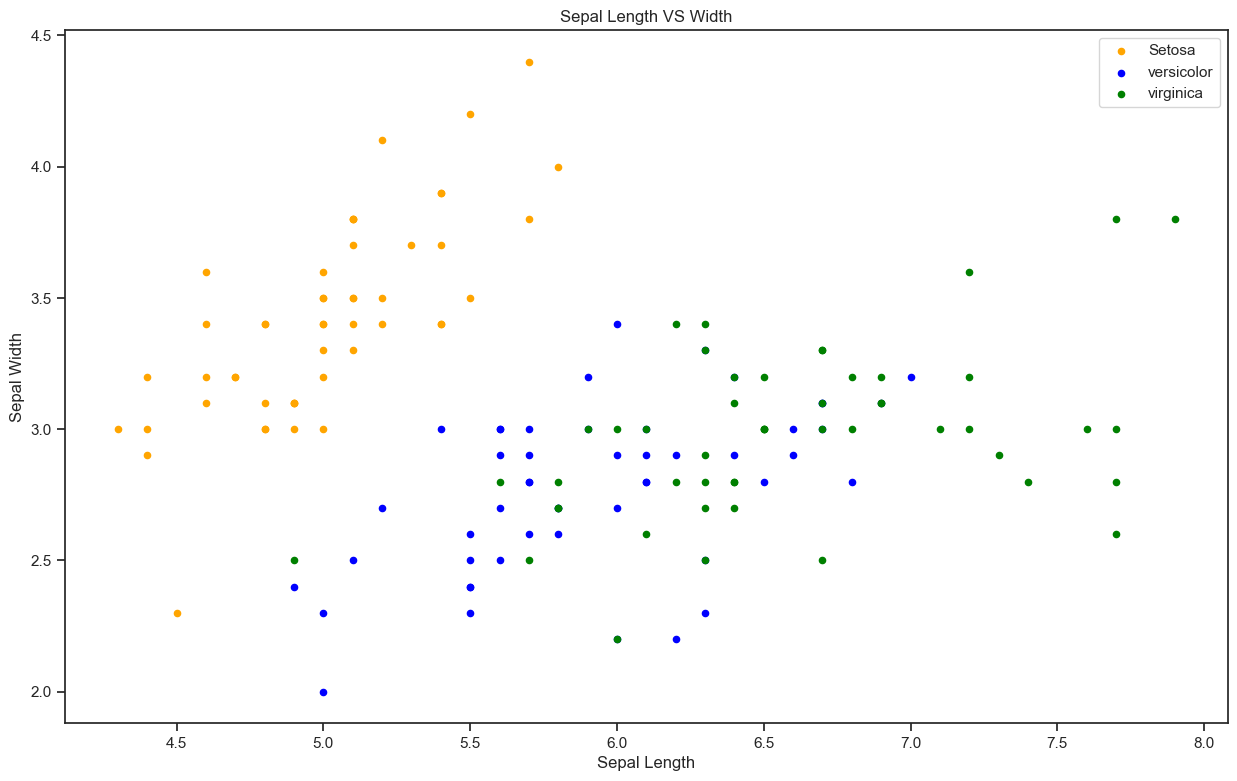

In [8]:
#gráfico de los sepalós largo vs anchos
#aqui se imprimen en el gráfico por tipo de especie de la setosa
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa') 
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
#aqui se ponen las etiquetas a los ejes 
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(15,9) #tamaño del gráfico
plt.show()

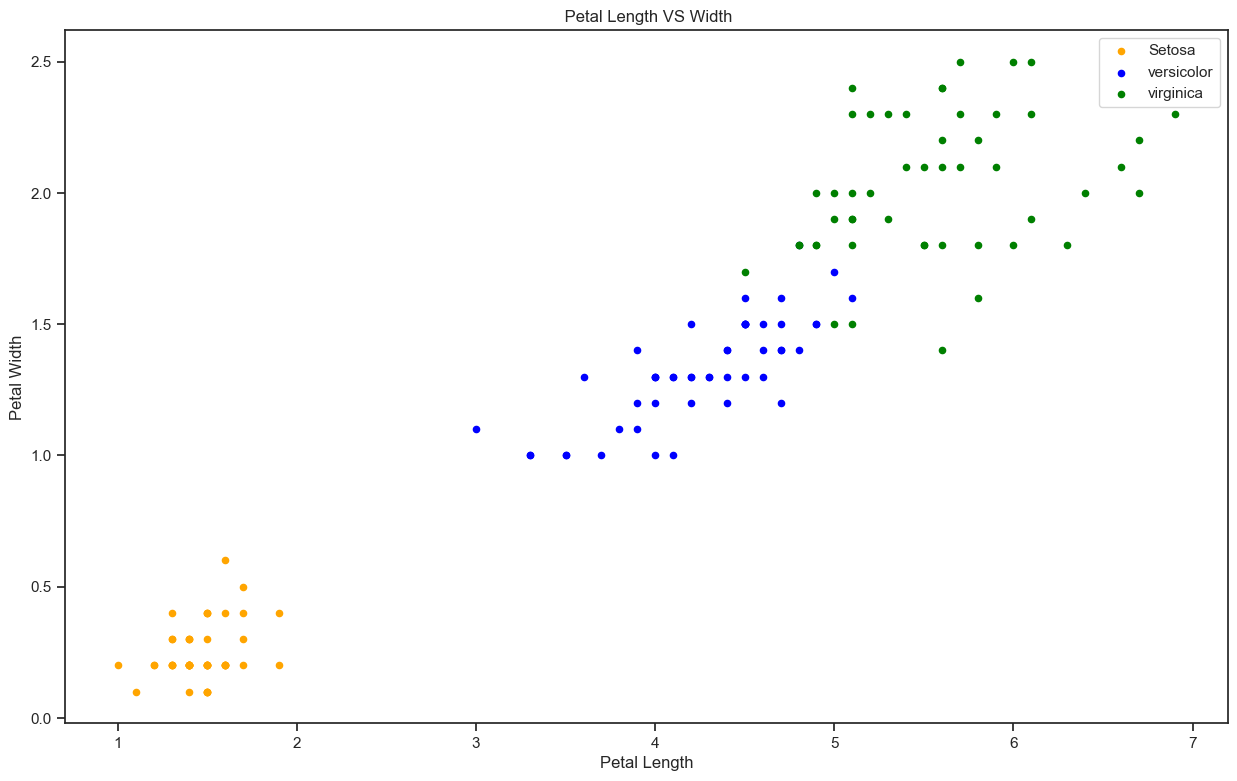

In [9]:
#scatterplot de largo del petalo vs el ancho
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(15,9)
plt.show()

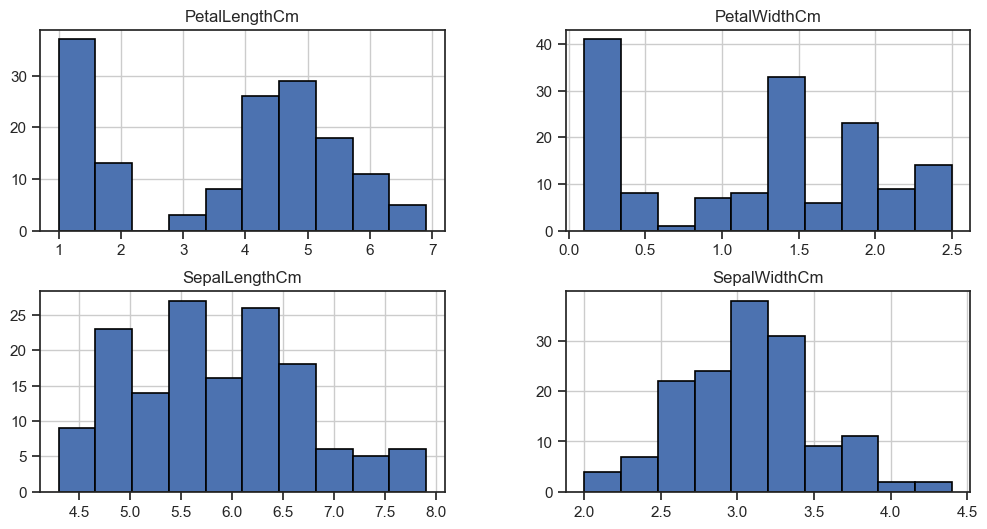

In [10]:
#historagramas de los datos
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

In [22]:
# gráfico de caja y bigote , este es con otra libreria 
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

In [21]:
#gráfico de sépalos por ancho y largo
sns.FacetGrid(iris, hue="Species", size=10) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


In [13]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=10)

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


In [14]:
#gráficos de distribucion
sns.FacetGrid(iris, hue="Species", size=10) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

In [15]:
sns.pairplot(iris, hue="Species", size=3 ,diag_kind="kde")

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


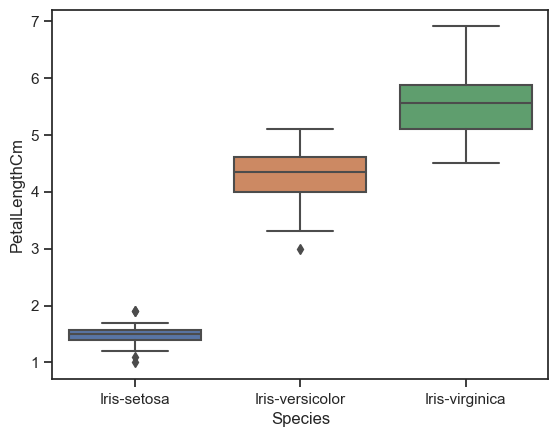

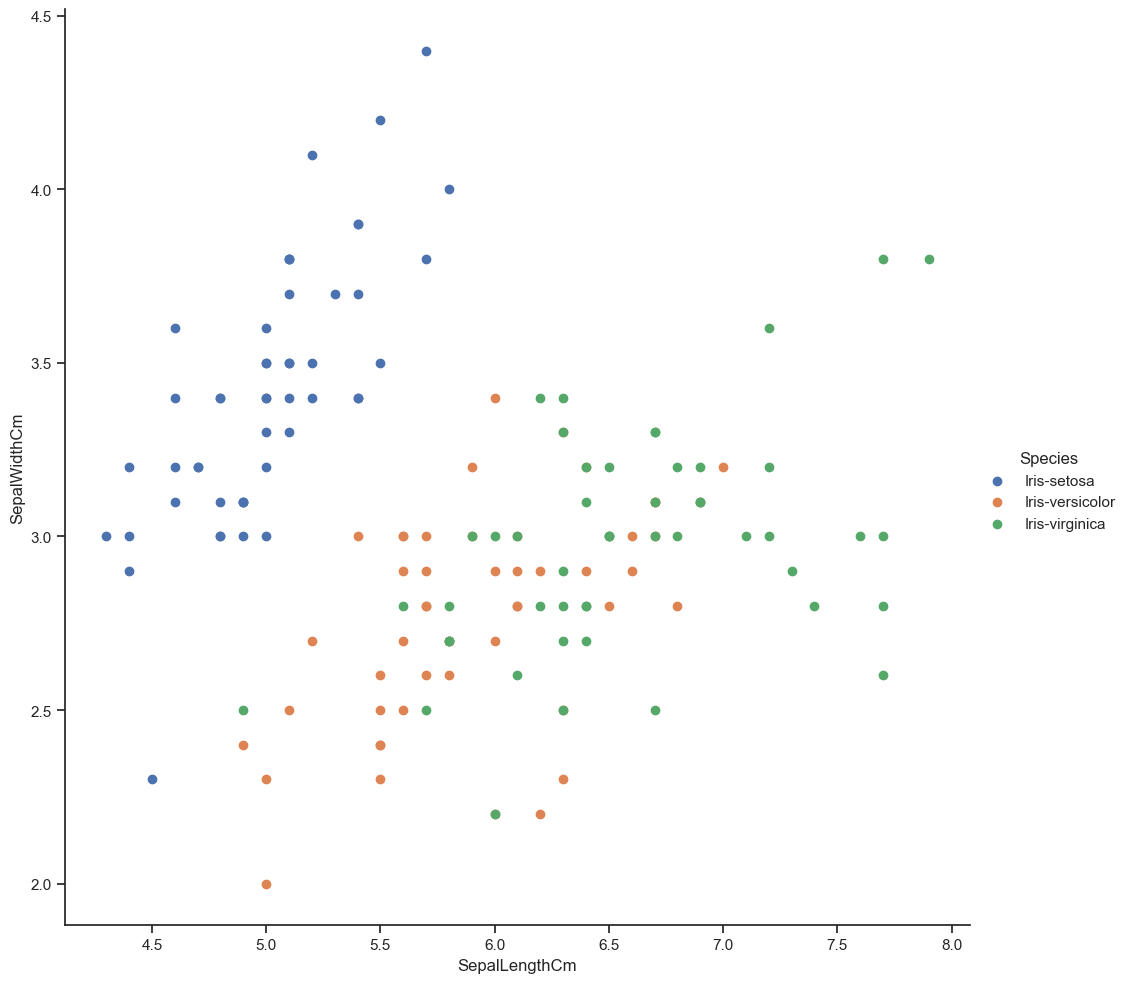

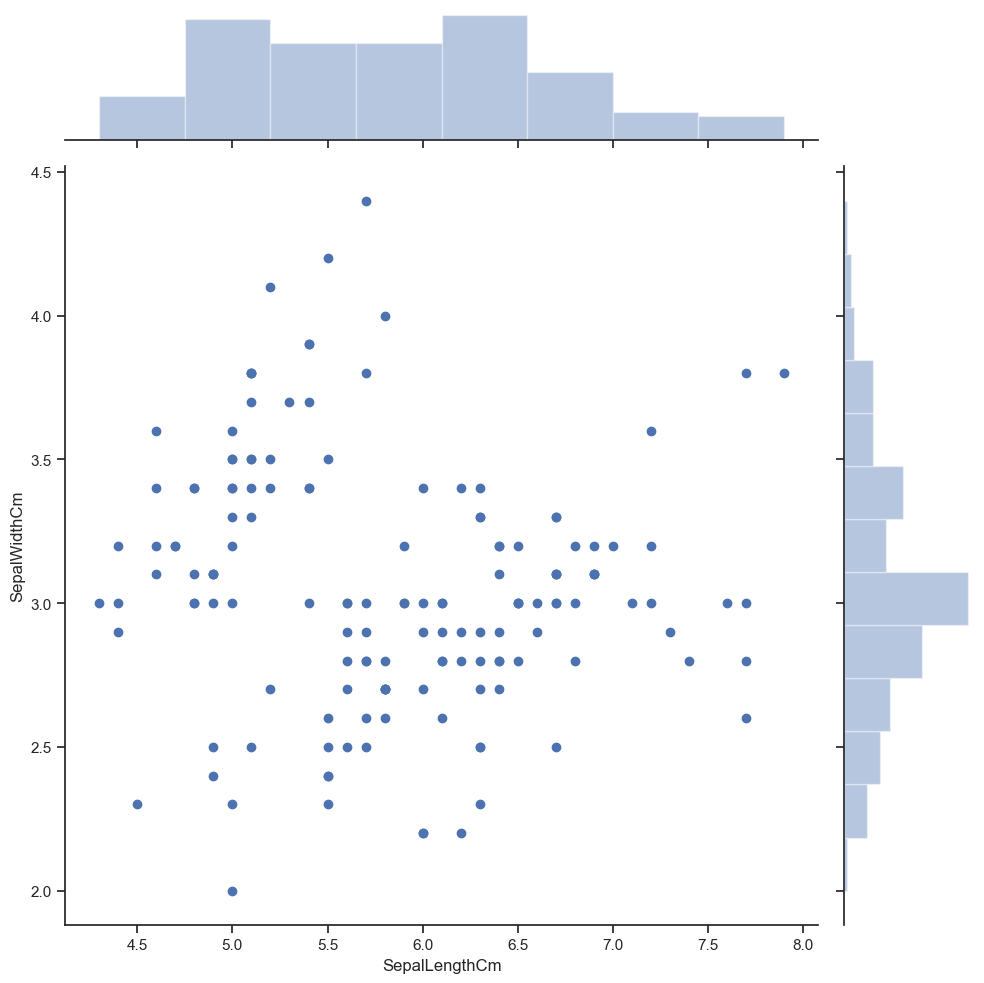

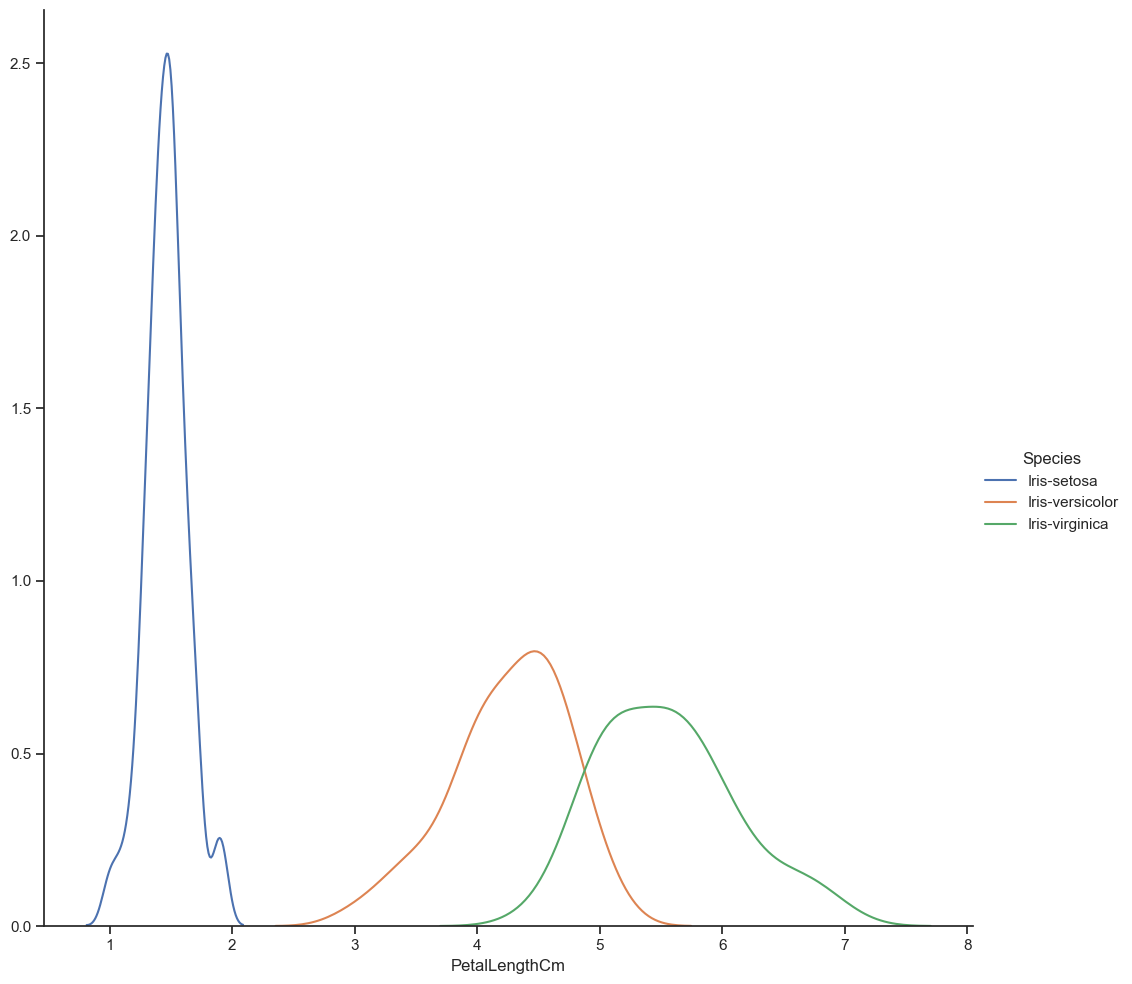

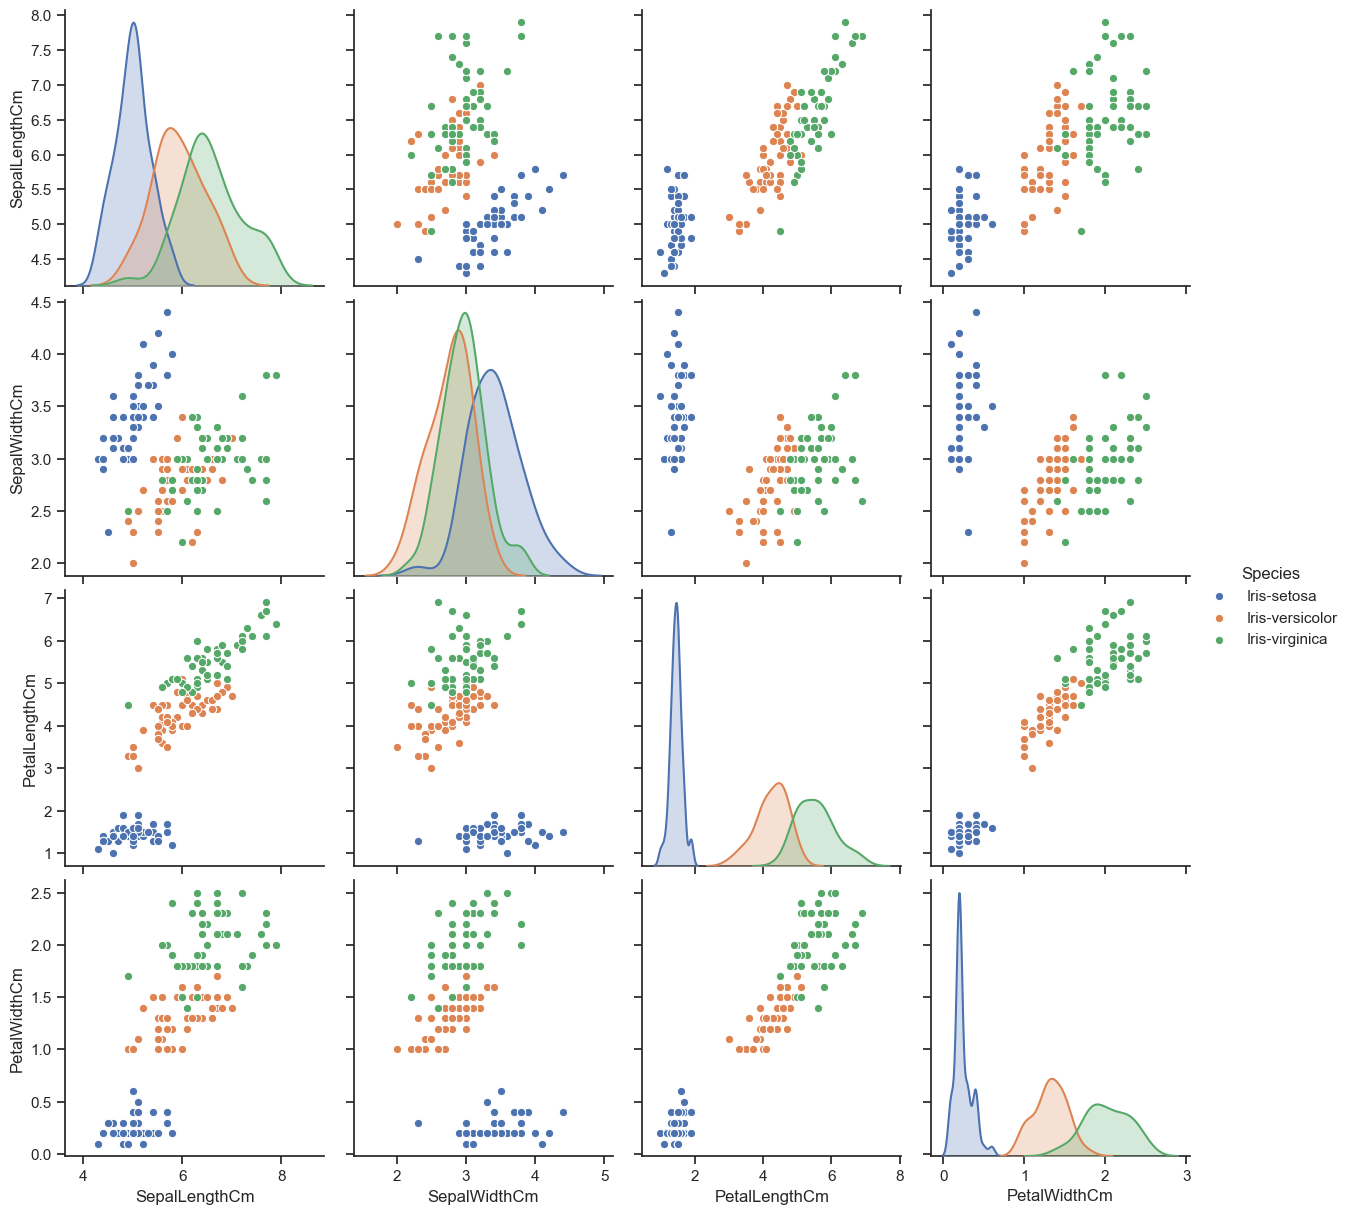

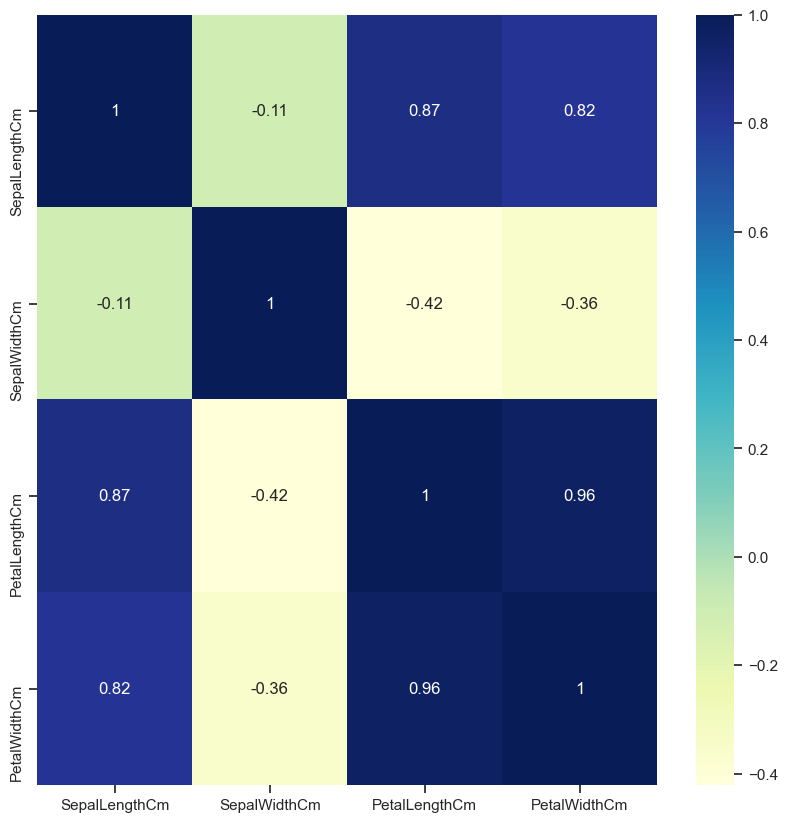

In [16]:
plt.figure(figsize=(10,10)) 
sns.heatmap(iris.corr(),annot=True,cmap="YlGnBu") 
plt.show()

In [23]:
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris, "Species", color=('#556270', '#4ECDC4', '#C7F464'))

In [24]:
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.linear_model import LinearRegression 

In [27]:
X1= iris.loc[:,iris.columns != 'Species']

In [28]:
Y1= iris['Species']

In [29]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.30, random_state=32)

In [30]:
model = LogisticRegression()
model.fit(x_train1,y_train1)
prediction=model.predict(x_test1)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,y_test1))

The accuracy of the Logistic Regression is 1.0


In [31]:
model=DecisionTreeClassifier()
model.fit(x_train1,y_train1)
prediction=model.predict(x_test1)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,y_test1))

The accuracy of the Decision Tree is 0.9777777777777777


In [32]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 15))

print(f"Profundidad del árbol: {model.get_depth()}")
print(f"Número de nodos terminales: {model.get_n_leaves()}")

plot = tree.plot_tree(
            decision_tree = model,
            feature_names = iris.drop(columns = "Species").columns,
            class_names   = 'Species',
            filled        = True,
            impurity      = True,
            fontsize      = 15,
            precision     = 2,
       )
fig.savefig("decistion_tree.png")

Profundidad del árbol: 5
Número de nodos terminales: 9
